<a href="https://colab.research.google.com/github/StratagemGIS/notebooks/blob/main/data_processing/40_coordinate_systems.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Vaasudevan Srinivasan 🧑🏻‍💻  
StratagemGIS Solutions

In [ ]:
import geopandas as gpd
import matplotlib.pyplot as plt
import pooch
from shapely.geometry import box

In [ ]:
world_map_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/world_map.gpkg',
    known_hash='af51690422b67af0aec953a5146f8998b4c785b4b41fadc7c542125109790445'
)

graticules_file = pooch.retrieve(
    'https://github.com/StratagemGIS/datasets/raw/main/vector/ne_10m_graticules_all.zip',
    known_hash='a45ccc199fb17642b76528c786992324729c3079dfa7a14f5fe70ae9e4e82a67'
)

world_map = gpd.read_file(world_map_file).to_crs('EPSG:4326')
graticules = gpd.read_file(graticules_file, layer='ne_10m_graticules_1').to_crs('EPSG:4326')

In [ ]:
def plot(crs, name=''):

    place_df = world_map.dropna(subset=['woe_label']).query(f'woe_label.str.contains(@name)')
    place_bounds = box(*place_df.total_bounds)

    ax = place_df.to_crs(crs).boundary.plot(color='red', linewidth=.5)
    (graticules.query('geometry.intersects(@place_bounds)')
        .intersection(place_bounds)
        .to_crs(crs).plot(ax=ax, linewidth=.1)
    )

    ax.set_axis_off()
    plt.gcf().set_dpi(150);

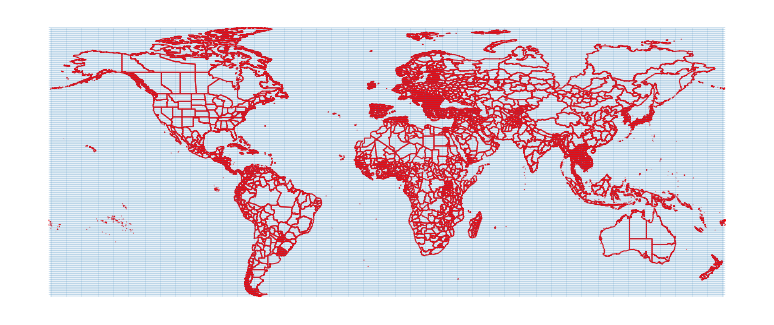

In [ ]:
plot(crs='EPSG:4326')

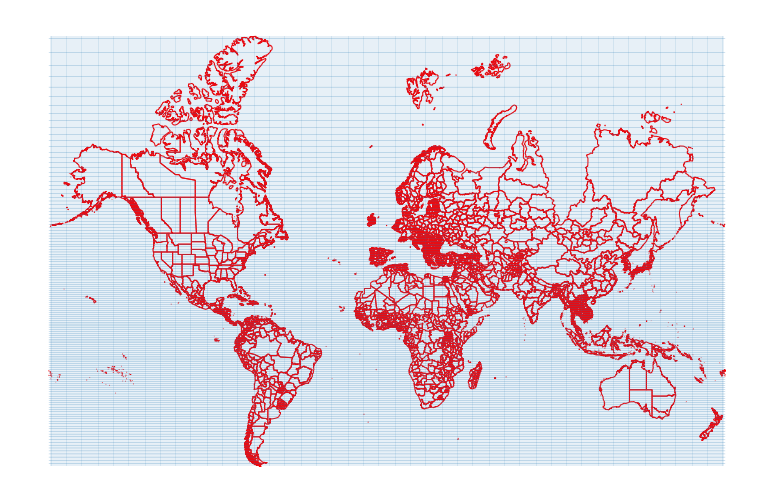

In [ ]:
plot(crs='EPSG:3857')

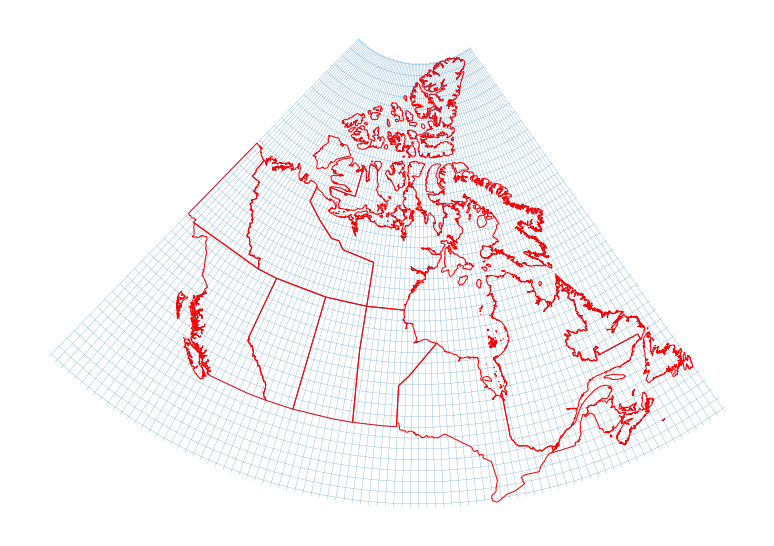

In [ ]:
plot(crs='EPSG:3348', name='CA')

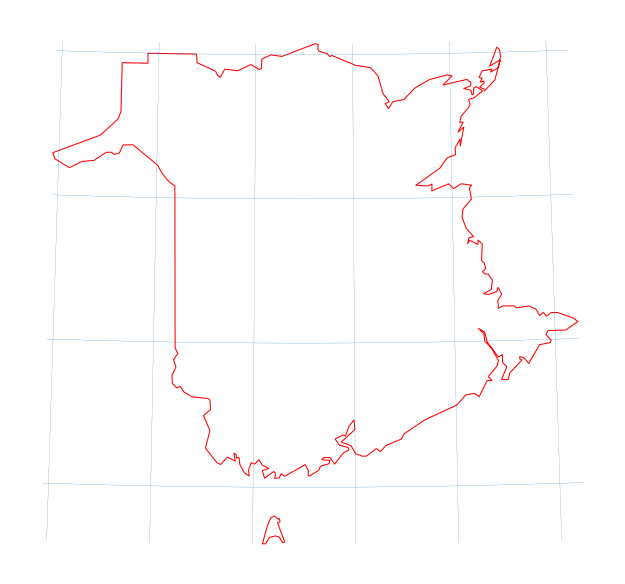

In [ ]:
plot(crs='EPSG:2953', name='New Brunswick')

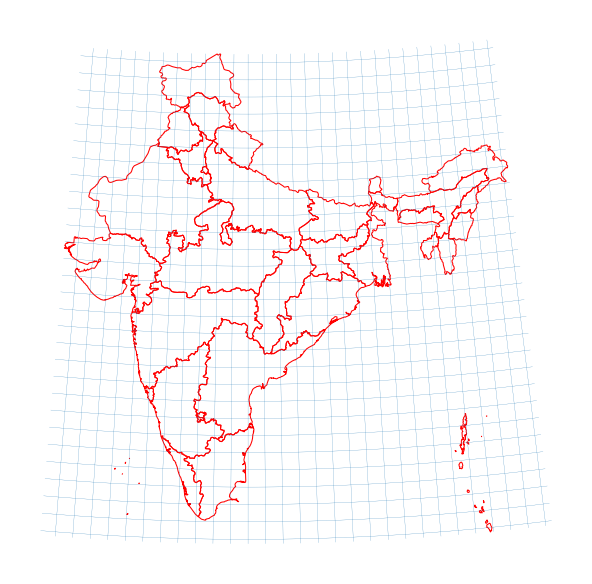

In [ ]:
plot(crs='EPSG:7755', name='IN')